In [1]:
import  pandas

In [2]:
# Load some cycling data from Strava as as example
rides = pandas.read_csv('Strava2021.csv', parse_dates=['start_time'])
rides['avg_speed'] = rides.distance / rides.moving_time
rides['start_date'] = rides.start_time.dt.normalize()

In [3]:
# We want to study the ride data in relation to the weather on that day, so we load a separate data set from the Bureau of Meteorology
bom = pandas.read_csv('BrisbaneDailyWeather.csv')
bom.index = pandas.to_datetime(bom[['year','month','day']])
bom = bom[['MinTemp', 'MaxTemp', 'Rainfall']]

In [4]:
# Combining the those two data sets as previously ...
combined = rides.join(bom, on = 'start_date')
combined

,start_time,name,distance,moving_time,elevation,average_watts,max_speed,avg_speed,start_date,MinTemp,MaxTemp,Rainfall
0,2021-02-01 19:35:00,Pedalheads 100 special,102.0,3.18,441.0,188.0,54.3,32.075472,2021-02-01,22.5,29.7,1.4
1,2021-04-01 19:10:00,Return to Hack's Samford Gentleman's ride,46.9,1.66,733.6,193.0,66.9,28.253012,2021-04-01,18.0,26.2,0.0
2,2021-05-01 19:30:00,Morning Ride,34.5,1.09,136.0,184.0,51.8,31.651376,2021-05-01,16.7,22.3,6.2
3,2021-07-01 19:21:00,Morning Ride,33.8,0.98,121.0,226.0,55.0,34.489796,2021-07-01,11.9,20.5,7.0
4,2021-11-01 19:11:00,Morning Ride,49.3,1.76,718.0,184.0,68.7,28.011364,2021-11-01,16.0,24.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
205,2021-12-26 22:30:00,Zwift - Dutch Diesel Cycling Starter Ride (C),60.3,1.52,89.0,177.0,46.1,39.671053,2021-12-26,20.8,28.4,7.6
206,2021-12-27 01:30:00,Zwift - OTR Tempo Group Ride,30.1,0.88,341.0,203.0,66.1,34.204545,2021-12-27,21.3,28.9,0.0
207,2021-12-27 19:00:00,Zwift - Rapha Festive 500 Group Ride Led By Et...,60.1,1.61,323.0,185.0,77.0,37.329193,2021-12-27,21.3,28.9,0.0
208,2021-12-28 19:00:00,Morning Ride,86.9,2.96,472.0,158.0,58.3,29.358108,2021-12-28,19.6,25.7,14.6


In [5]:
# We now wish to look for patterns in this combined data ...

<AxesSubplot:xlabel='avg_speed', ylabel='MaxTemp'>

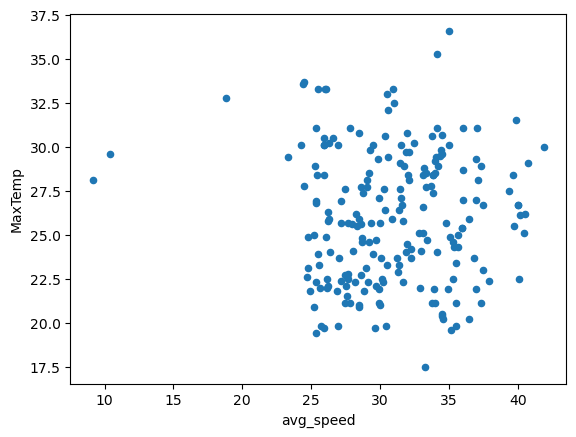

In [6]:
# We start by looking for a pattern or relationship between avg_speed and MaxTemp
# In this case we use a scatter plot to visually look for a pattern or relationship
combined.plot.scatter(x = 'avg_speed', y = 'MaxTemp')

# Looking at the resulting plot, we don't see any clear relationship between these two variables.

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

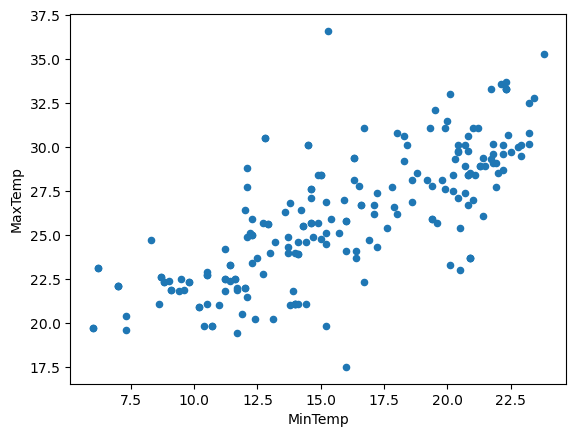

In [7]:
# By comparision, we are able to (visually) see a clear relationship between MinTemp and MaxTemp
combined.plot.scatter(x = 'MinTemp', y = 'MaxTemp')

In [8]:
# Rather than inspecting the data visually, we can instead quantitatively measure the statistical correlation between those two variables
combined.MinTemp.corr(combined.MaxTemp)

# A value of 0.75 shows a strong positive correlation between these two variables

0.7522532233865161

In [9]:
# A correlation cooefficient of 1.0 indicates a perfect correlation
combined.MinTemp.corr(combined.MinTemp)

1.0

<AxesSubplot:xlabel='MinTemp', ylabel='MinTemp'>

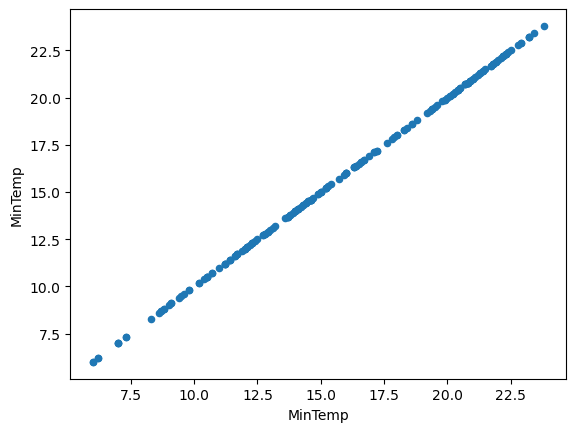

In [10]:
# Visually, this perfect correlation can be seen as a straight line plot
combined.plot.scatter(x = 'MinTemp', y = 'MinTemp')

In [11]:
# The average speed is slightly correlated with the MinTemp (although we did not see it visually)
combined.MinTemp.corr(combined.avg_speed)

0.12889353799554037

In [12]:
# The average speed is negatively correlated with the MaxTemp.
# A negative correlation means that a higher MaxTemp would tend to produce a lower average speed.
# However, in this example, the value is so close to 0.0 that we would say there is effectively no correlation (i.e. within the margin of error of the experimental data)
combined.MaxTemp.corr(combined.avg_speed)

-0.007855018562520967

In [13]:
# Or we can ask for the correlation between all pairs of numeric columns
combined.corr()

,distance,moving_time,elevation,average_watts,max_speed,avg_speed,MinTemp,MaxTemp,Rainfall
distance,1.000000,0.940718,0.414023,0.277241,0.193675,0.315034,0.255150,0.194449,-0.032644
moving_time,0.940718,1.000000,0.535511,0.112357,0.107228,0.032837,0.252697,0.211409,-0.066543
elevation,0.414023,0.535511,1.000000,-0.013030,0.412788,-0.253571,0.096340,0.125490,-0.093572
average_watts,0.277241,0.112357,-0.013030,1.000000,0.155901,0.765292,0.206919,0.079206,0.159048
max_speed,0.193675,0.107228,0.412788,0.155901,1.000000,0.286832,0.029610,0.016619,0.027467
avg_speed,0.315034,0.032837,-0.253571,0.765292,0.286832,1.000000,0.128894,-0.007855,0.211152
MinTemp,0.255150,0.252697,0.096340,0.206919,0.029610,0.128894,1.000000,0.752253,0.170858
MaxTemp,0.194449,0.211409,0.125490,0.079206,0.016619,-0.007855,0.752253,1.000000,0.056198
Rainfall,-0.032644,-0.066543,-0.093572,0.159048,0.027467,0.211152,0.170858,0.056198,1.000000


In [14]:
# Try creating some examples of your own ...